### CNN for predicting a time series
###  Edgar Acuna
#### Adapted from https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
#### February 2022
#### Dataset: Sunspots

In [40]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [41]:
#Loading the data
#url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = read_csv('https://academic.uprm.edu/eacuna/sunspots.csv', usecols=[1], engine='python')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sunspots  2820 non-null   float64
dtypes: float64(1)
memory usage: 22.2 KB


In [43]:
#Normalizing the data
data = np.array(df.values.astype('float32'))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()
n = len(data)
#Creating train (80% percent) and test data (20 %) 
split_percent=.8
split = int(n*split_percent)
train_data = data[range(split)]
test_data = data[split:]

In [44]:
print(train_data.shape)
print(test_data.shape)

(2256,)
(564,)


In [45]:
#Splitting the time series in time steps of size 12
time_steps = 12
Y_ind = np.arange(time_steps, len(train_data), time_steps)
trainY = train_data[Y_ind]
rows_x = len(trainY)
#print("rows-x=",rows_x)
trainX = train_data[range(time_steps*rows_x)]
#print(trainX.shape)
trainX = np.reshape(trainX, (rows_x, time_steps, 1))  
print("dim of TrainX=",trainX.shape)
Y1_ind = np.arange(time_steps, len(test_data), time_steps)
testY = test_data[Y1_ind]
rows_x1 = len(testY)
#print(rows_x1)
testX = test_data[range(time_steps*rows_x1)]
testX = np.reshape(testX, (rows_x1, time_steps, 1)) 
print("dim of TestX",testX.shape)

dim of TrainX= (187, 12, 1)
dim of TestX (46, 12, 1)


In [46]:
#n_steps=12
n_features=1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.summary()
model.compile(optimizer='adam', loss='mse')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 11, 64)            192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                16050     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 16,293
Trainable params: 16,293
Non-trainable params: 0
_________________________________________________________________


#### The number of parameters in  the CNN model are  16,293 

In [47]:
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 0s - loss: 0.0076
Epoch 2/20
187/187 - 0s - loss: 0.0059
Epoch 3/20
187/187 - 0s - loss: 0.0053
Epoch 4/20
187/187 - 0s - loss: 0.0053
Epoch 5/20
187/187 - 0s - loss: 0.0049
Epoch 6/20
187/187 - 0s - loss: 0.0042
Epoch 7/20
187/187 - 0s - loss: 0.0047
Epoch 8/20
187/187 - 0s - loss: 0.0052
Epoch 9/20
187/187 - 0s - loss: 0.0045
Epoch 10/20
187/187 - 0s - loss: 0.0046
Epoch 11/20
187/187 - 0s - loss: 0.0047
Epoch 12/20
187/187 - 0s - loss: 0.0044
Epoch 13/20
187/187 - 0s - loss: 0.0043
Epoch 14/20
187/187 - 0s - loss: 0.0043
Epoch 15/20
187/187 - 0s - loss: 0.0040
Epoch 16/20
187/187 - 0s - loss: 0.0045
Epoch 17/20
187/187 - 0s - loss: 0.0046
Epoch 18/20
187/187 - 0s - loss: 0.0042
Epoch 19/20
187/187 - 0s - loss: 0.0039
Epoch 20/20
187/187 - 0s - loss: 0.0047


In [48]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [49]:
# Error of predictions
train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))    

Train RMSE: 0.072 RMSE
Test RMSE: 0.106 RMSE


In [50]:
# Function to Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

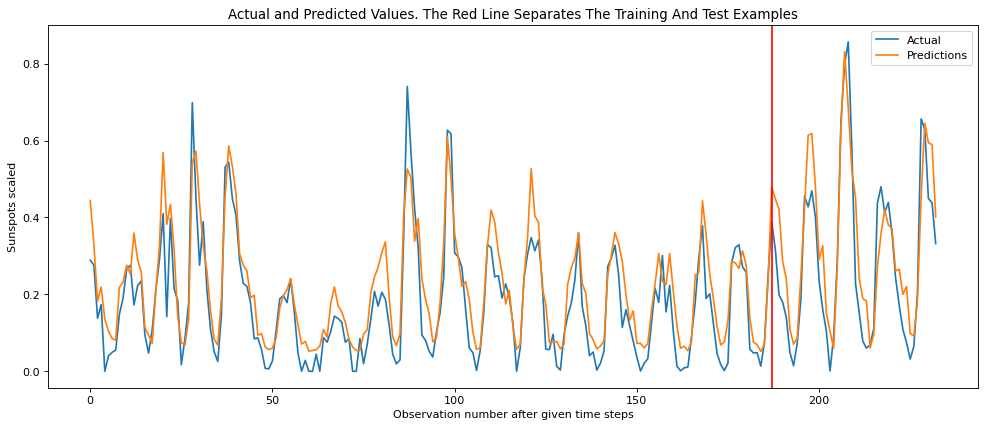

In [51]:
#Ploting results
plot_result(trainY, testY, train_predict, test_predict)